In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
ldir = os.chdir(r'C:\Users\Gergely\Documents\Datasets')

In [2]:
df = pd.read_csv('Cars.csv')
df.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [3]:
df.dropna(inplace=True)

In [4]:
df.shape

(392, 9)

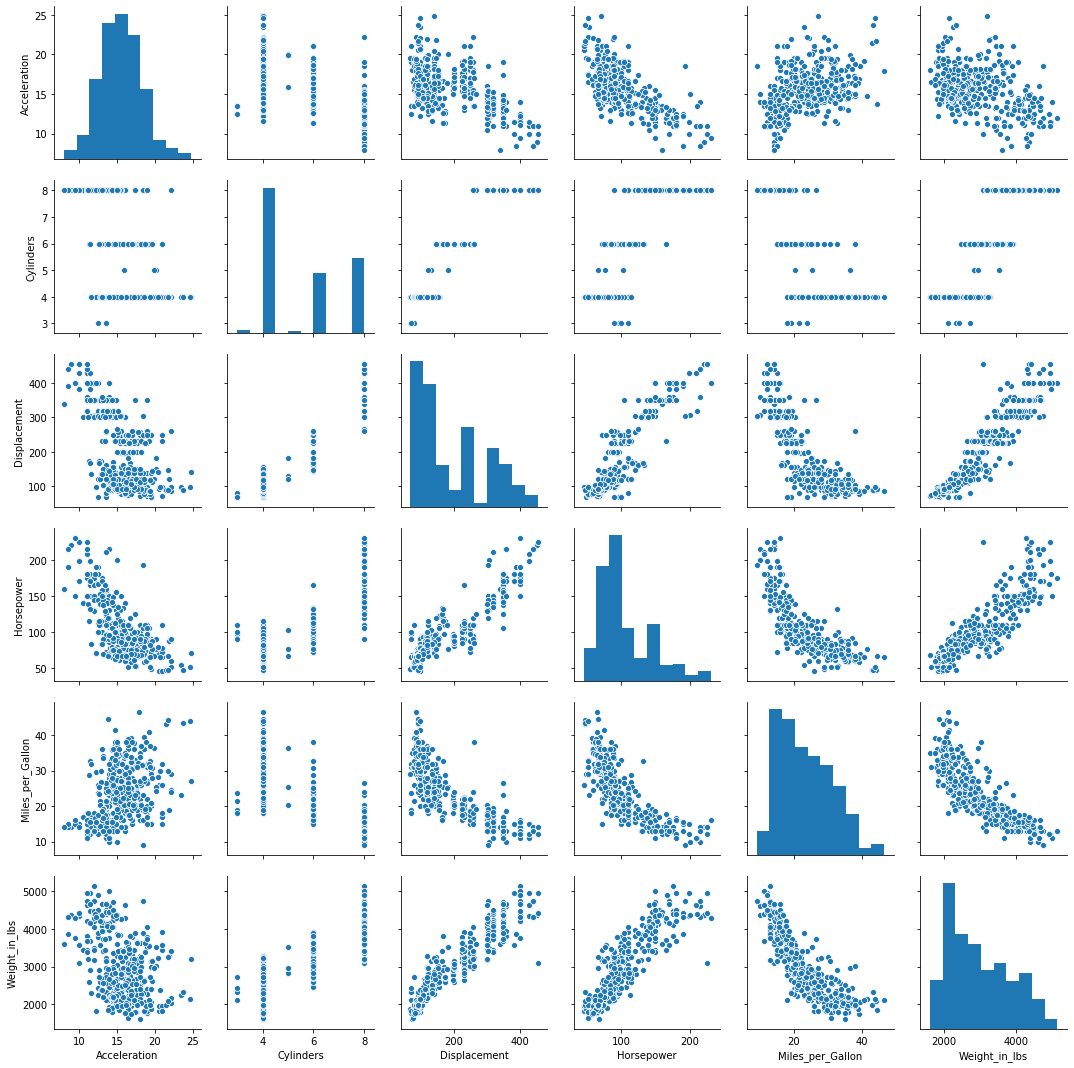

In [5]:
sns.pairplot(df)

### Scatterplot: Horsepower - Weight_in_lbs

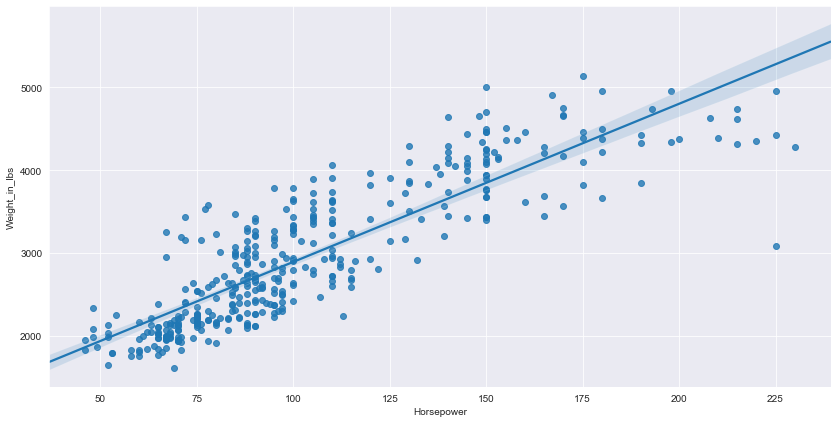

In [32]:
plt.figure(figsize=(14, 7))
sns.set_style('darkgrid')
sns.regplot(data=df, x='Horsepower', y='Weight_in_lbs')

### Korreláció

#### Numpy pearson r

In [7]:
np.corrcoef(df['Horsepower'], df['Weight_in_lbs'])[0, 1]

0.8645377375741443

#### Scipy.stats:  Pearson's,  Spearman's rho,  kendall's tau

In [36]:
print('   Pearson p: ', scipy.stats.pearsonr(df['Horsepower'], df['Weight_in_lbs']))
print('Spearman rho: ', scipy.stats.spearmanr(df['Horsepower'], df['Weight_in_lbs']))
print(' kendall tau: ', scipy.stats.kendalltau(df['Horsepower'], df['Weight_in_lbs']))

   Pearson p:  (0.8645377375741445, 1.364346877373023e-118)
Spearman rho:  SpearmanrResult(correlation=0.878819325346196, pvalue=2.182673544734102e-127)
 kendall tau:  KendalltauResult(correlation=0.703729831881065, pvalue=4.0622161606911726e-94)


###  
###  
### Lineáris regresszió - Scipy

In [11]:
lr = scipy.stats.linregress(df['Horsepower'], df['Weight_in_lbs'])

#### Együtthatók

In [12]:
print('ß0: ', lr.intercept, ', ß1: ', lr.slope, 'X')

ß0:  984.5003267702384 , ß1:  19.078161552697463 X


#### r, p, std_err

In [13]:
print('        r: ', lr.rvalue)
print('        p: ', lr.pvalue)
print('std_error: ', lr.stderr)

        r:  0.8645377375741442
        p:  1.3643468773734842e-118
std_error:  0.5615843732511717


In [40]:
scipy.stats.linregress(df['Horsepower'], df['Weight_in_lbs'])

LinregressResult(slope=19.078161552697463, intercept=984.5003267702384, rvalue=0.8645377375741442, pvalue=1.3643468773734842e-118, stderr=0.5615843732511717)

#### prediction - x értékhez tartózó y meghatározása lineáris regresszióval

In [14]:
x1 = 150
y1 = x1*lr.slope+lr.intercept
y1

3846.224559674858

#### predict függvény készítése

In [15]:
def linreg_y(slope, intercept, x):
    return x*slope + intercept

linreg_y(lr.slope, lr.intercept, 150)

3846.224559674858

### Lineáris regresszió - Scikitlearn

In [16]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(np.array(df['Horsepower']).reshape(-1, 1), np.array(df['Weight_in_lbs']).reshape(-1, 1))

print('ß0: ', regressor.intercept_)
print('ß1: ', regressor.coef_)
print('r^2:', regressor.score(np.array(df['Horsepower']).reshape(-1, 1), np.array(df['Weight_in_lbs']).reshape(-1, 1)))

ß0:  [984.50032677]
ß1:  [[19.07816155]]
r^2: 0.7474254996898199


#### prediction - x értékhez tartózó y meghatározása lineáris regresszióval

In [17]:
regressor.predict([[150]])

array([[3846.22455967]])

#### Lineáris regresszió ábrázolása

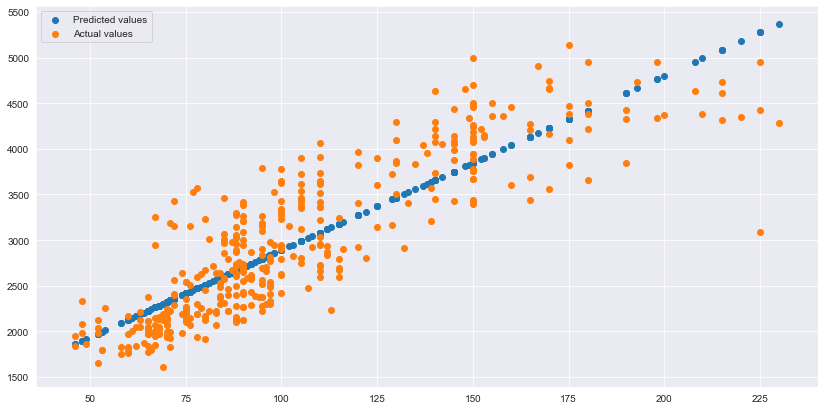

In [18]:
y_sk_linear = regressor.predict(np.array(df['Horsepower']).reshape(-1, 1))

plt.figure(figsize=(14, 7))
plt.scatter(x=df['Horsepower'], y=y_sk_linear, label='Predicted values')
plt.scatter(x=df['Horsepower'], y=df['Weight_in_lbs'], label='Actual values')
plt.legend()

###  
###  
### Polynomiális regresszió - Scikitlearn

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(np.array(df['Horsepower']).reshape(-1, 1))

x_ = transformer.transform(np.array(df['Horsepower']).reshape(-1, 1))
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(np.array(df['Horsepower']).reshape(-1, 1))

sk_poly = LinearRegression().fit(x_, df['Weight_in_lbs'])

#### Kiértékelés - együtthatók, r^2

In [20]:
r_sq = sk_poly.score(x_, df['Weight_in_lbs'])
print(' ß0: ', sk_poly.intercept_)
print('Együtthatók: ', sk_poly.coef_)
print('r^2: ', r_sq)

 ß0:  -203.79819827882375
Együtthatók:  [40.67687828 -0.08619569]
r^2:  0.7812358269076232


#### Polynomiális regresszió ábrázolása

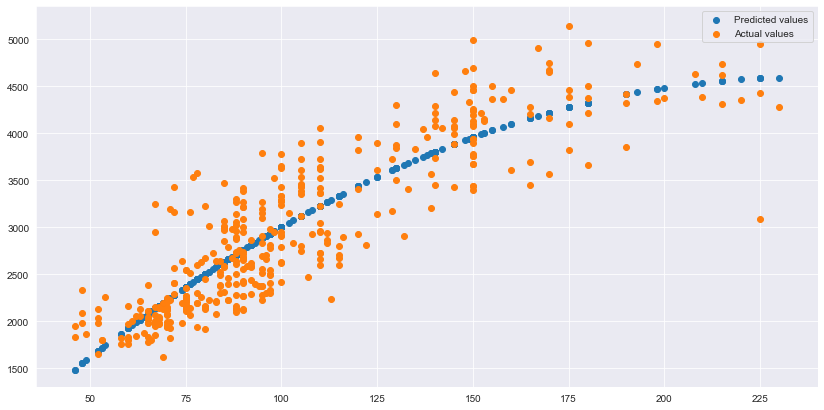

In [21]:
y_sk_poly = sk_poly.predict(x_)

plt.figure(figsize=(14, 7))
plt.scatter(x=df['Horsepower'], y=y_sk_poly, label='Predicted values')
plt.scatter(x=df['Horsepower'], y=df['Weight_in_lbs'], label='Actual values')
plt.legend()

#### prediction - x értékhez tartózó y meghatározása polynomiális regresszióval

In [22]:
def polyreg_y(slope, intercept, x):
    return x*slope[0]+x**2*slope[1] + intercept

polyreg_y(sk_poly.coef_, sk_poly.intercept_, 150)

3958.3305522643436

### Polynomiális regresszió: Horsepower - Miles_per_Gallon

In [23]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(np.array(df['Horsepower']).reshape(-1, 1))

x_ = transformer.transform(np.array(df['Horsepower']).reshape(-1, 1))
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(np.array(df['Horsepower']).reshape(-1, 1))

sk_poly = LinearRegression().fit(x_, df['Miles_per_Gallon'])

#### Kiértékelés - együtthatók, r^2

In [24]:
r_sq = sk_poly.score(x_, df['Miles_per_Gallon'])
print(' ß0: ', sk_poly.intercept_)
print('Együtthatók: ', sk_poly.coef_)
print('r^2: ', r_sq)

 ß0:  56.900099702112925
Együtthatók:  [-0.46618963  0.00123054]
r^2:  0.6875590305127517


In [38]:
print('Lineáris, Pearson-r: ', scipy.stats.pearsonr(df['Horsepower'], df['Miles_per_Gallon']))
print('Lineáris, Spearmanr-r: ', scipy.stats.spearmanr(df['Horsepower'], df['Miles_per_Gallon']))
print('Lineáris, Kendalltau-r: ', scipy.stats.kendalltau(df['Horsepower'], df['Miles_per_Gallon']))

Lineáris, Pearson-r:  (-0.7784267838977761, 7.031989029404151e-81)
Lineáris, Spearmanr-r:  SpearmanrResult(correlation=-0.8536164024453882, pvalue=1.619383245501938e-112)
Lineáris, Kendalltau-r:  KendalltauResult(correlation=-0.6791658132611216, pvalue=2.331121847638935e-86)


#### Polynomiális regresszió ábrázolása

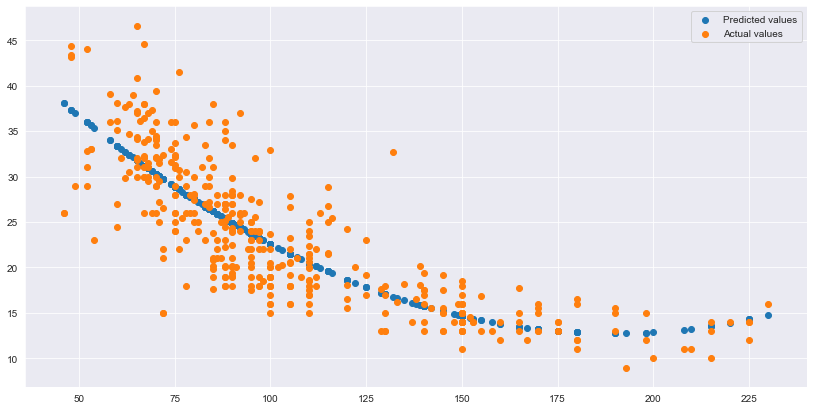

In [27]:
y_sk_poly = sk_poly.predict(x_)

plt.figure(figsize=(14, 7))
plt.scatter(x=df['Horsepower'], y=y_sk_poly, label='Predicted values')
plt.scatter(x=df['Horsepower'], y=df['Miles_per_Gallon'], label='Actual values')
plt.legend()

#### prediction - x értékhez tartózó y meghatározása polynomiális regresszióval

In [30]:
polyreg_y(sk_poly.coef_, sk_poly.intercept_, 150)

14.658717477423153